# Title: Global plastic usage: future impact awareness

##  EDA, PCA & ML


### Introduction

This report undertakes the identification of critical issues associated with global plastic usage. The pervasive problem of plastic consumption unfolds as a multidimensional crisis demanding immediate attention. With each passing day, the escalating reliance on plastic exacerbates, posing severe consequences for the environment and future generations

## Import Libraries

Imported libraries are assigned abbreviated formats, facilitating faster recall and utilization

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

#### Importing Dataset

In [3]:
GB_df =pd.read_csv ("per-capita-plastic-waste-vs-gdp-per-capita.csv")

## Exploratory Data Analysis (EDA)

In [4]:
GB_df.head()

Entity      Code  Year  Per capita plastic waste (kg/person/day)  \
0     Abkhazia  OWID_ABK  2015                                       NaN   
1  Afghanistan       AFG  2002                                       NaN   
2  Afghanistan       AFG  2003                                       NaN   
3  Afghanistan       AFG  2004                                       NaN   
4  Afghanistan       AFG  2005                                       NaN   

   GDP per capita, PPP (constant 2011 international $)  \
0                                                NaN     
1                                        1063.635574     
2                                        1099.194507     
3                                        1062.249360     
4                                        1136.123214     

   Total population (Gapminder, HYDE & UN) Continent  
0                                      NaN      Asia  
1                               22601000.0       NaN  
2                               23681000.0       NaN  
3                               24727000.0       NaN  
4                               25654000.0       NaN

Size of the dataset : In this section i have identified the size of the dataset using the follow code below: Dataset size: (48168, 7)

In [5]:
GB_df.shape

(48168, 7)

In [6]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
GB_df.describe().T

count          mean  \
Year                                                48168.0  1.903147e+03   
Per capita plastic waste (kg/person/day)              186.0  1.798118e-01   
GDP per capita, PPP (constant 2011 internationa...   6407.0  1.492610e+04   
Total population (Gapminder, HYDE & UN)             46883.0  2.982790e+07   

                                                             std          min  \
Year                                                3.157168e+02 -10000.00000   
Per capita plastic waste (kg/person/day)            1.230064e-01      0.01000   
GDP per capita, PPP (constant 2011 internationa...  1.773975e+04    247.43654   
Total population (Gapminder, HYDE & UN)             2.530860e+08    905.00000   

                                                              25%  \
Year                                                  1859.000000   
Per capita plastic waste (kg/person/day)                 0.103000   
GDP per capita, PPP (constant 2011 internationa...    3021.071807   
Total population (Gapminder, HYDE & UN)             201733.500000   

                                                             50%  \
Year                                                1.920000e+03   
Per capita plastic waste (kg/person/day)            1.440000e-01   
GDP per capita, PPP (constant 2011 internationa...  8.447264e+03   
Total population (Gapminder, HYDE & UN)             1.542937e+06   

                                                             75%           max  
Year                                                1.975000e+03  2.019000e+03  
Per capita plastic waste (kg/person/day)            2.520000e-01  6.860000e-01  
GDP per capita, PPP (constant 2011 internationa...  1.960754e+04  1.353188e+05  
Total population (Gapminder, HYDE & UN)             5.886795e+06  7.713468e+09

As there are many "NaN" values identified above, a quick look at the target variable's unique values will highlight if there are any "na" values in this target variable.

In [8]:
GB_df["Entity"].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states',
       'Cayman Islands', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comor

Below, some variables are picked at random to investigate their unique values in order to reveal the most recurring missing value abbreviation used and whether there are any other string values present.

In [9]:
GB_df["Year"].unique()

array([  2015,   2002,   2003,   2004,   2005,   2006,   2007,   2008,
         2009,   2010,   2011,   2012,   2013,   2014,   2016,   2017,
         1800,   1801,   1802,   1803,   1804,   1805,   1806,   1807,
         1808,   1809,   1810,   1811,   1812,   1813,   1814,   1815,
         1816,   1817,   1818,   1819,   1820,   1821,   1822,   1823,
         1824,   1825,   1826,   1827,   1828,   1829,   1830,   1831,
         1832,   1833,   1834,   1835,   1836,   1837,   1838,   1839,
         1840,   1841,   1842,   1843,   1844,   1845,   1846,   1847,
         1848,   1849,   1850,   1851,   1852,   1853,   1854,   1855,
         1856,   1857,   1858,   1859,   1860,   1861,   1862,   1863,
         1864,   1865,   1866,   1867,   1868,   1869,   1870,   1871,
         1872,   1873,   1874,   1875,   1876,   1877,   1878,   1879,
         1880,   1881,   1882,   1883,   1884,   1885,   1886,   1887,
         1888,   1889,   1890,   1891,   1892,   1893,   1894,   1895,
      

In [10]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [11]:
GB_df["Per capita plastic waste (kg/person/day)"].unique()

array([  nan, 0.069, 0.144, 0.062, 0.252, 0.66 , 0.183, 0.112, 0.39 ,
       0.132, 0.034, 0.57 , 0.08 , 0.172, 0.043, 0.165, 0.026, 0.154,
       0.066, 0.046, 0.093, 0.065, 0.119, 0.121, 0.201, 0.258, 0.103,
       0.089, 0.248, 0.045, 0.047, 0.149, 0.147, 0.178, 0.176, 0.189,
       0.234, 0.192, 0.054, 0.048, 0.068, 0.485, 0.04 , 0.2  , 0.325,
       0.28 , 0.03 , 0.586, 0.09 , 0.398, 0.281, 0.01 , 0.057, 0.43 ,
       0.297, 0.134, 0.171, 0.027, 0.686, 0.124, 0.094, 0.084, 0.368,
       0.016, 0.198, 0.322, 0.214, 0.23 , 0.087, 0.073, 0.015, 0.075,
       0.424, 0.331, 0.143, 0.063, 0.145, 0.097, 0.265, 0.16 , 0.042,
       0.654, 0.522, 0.221, 0.156, 0.358, 0.041, 0.194, 0.24 , 0.277,
       0.357, 0.163, 0.023, 0.223, 0.29 , 0.212, 0.199, 0.215, 0.335,
       0.295])

In [12]:
GB_df["Total population (Gapminder, HYDE & UN)"].unique()

array([      nan, 22601000., 23681000., ...,  9200000., 14439000.,
       14645000.])

In [13]:
GB_df.isnull().sum().sum()

140925

## Standardisation

In [14]:
missing_value_formats = ["n.a.","NA","na","n/a","n\a","?","--"]
GB_df = pd.read_csv("per-capita-plastic-waste-vs-gdp-per-capita.csv", na_values = missing_value_formats)

In [15]:
GB_df["Continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [16]:
GB_df.head()

Entity      Code  Year  Per capita plastic waste (kg/person/day)  \
0     Abkhazia  OWID_ABK  2015                                       NaN   
1  Afghanistan       AFG  2002                                       NaN   
2  Afghanistan       AFG  2003                                       NaN   
3  Afghanistan       AFG  2004                                       NaN   
4  Afghanistan       AFG  2005                                       NaN   

   GDP per capita, PPP (constant 2011 international $)  \
0                                                NaN     
1                                        1063.635574     
2                                        1099.194507     
3                                        1062.249360     
4                                        1136.123214     

   Total population (Gapminder, HYDE & UN) Continent  
0                                      NaN      Asia  
1                               22601000.0       NaN  
2                               23681000.0       NaN  
3                               24727000.0       NaN  
4                               25654000.0       NaN

In [17]:
GB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [18]:
f5_l5_columns = pd.concat([GB_df.iloc[:, :6], GB_df.iloc[:,-5:]], axis = 1)
f5_l5_columns.describe()

Year  Per capita plastic waste (kg/person/day)  \
count  48168.000000                                186.000000   
mean    1903.147442                                  0.179812   
std      315.716839                                  0.123006   
min   -10000.000000                                  0.010000   
25%     1859.000000                                  0.103000   
50%     1920.000000                                  0.144000   
75%     1975.000000                                  0.252000   
max     2019.000000                                  0.686000   

       GDP per capita, PPP (constant 2011 international $)  \
count                                        6407.000000     
mean                                        14926.095591     
std                                         17739.754531     
min                                           247.436540     
25%                                          3021.071807     
50%                                          8447.264179     
75%                                         19607.537075     
max                                        135318.754421     

       Total population (Gapminder, HYDE & UN)          Year  \
count                             4.688300e+04  48168.000000   
mean                              2.982790e+07   1903.147442   
std                               2.530860e+08    315.716839   
min                               9.050000e+02 -10000.000000   
25%                               2.017335e+05   1859.000000   
50%                               1.542937e+06   1920.000000   
75%                               5.886795e+06   1975.000000   
max                               7.713468e+09   2019.000000   

       Per capita plastic waste (kg/person/day)  \
count                                186.000000   
mean                                   0.179812   
std                                    0.123006   
min                                    0.010000   
25%                                    0.103000   
50%                                    0.144000   
75%                                    0.252000   
max                                    0.686000   

       GDP per capita, PPP (constant 2011 international $)  \
count                                        6407.000000     
mean                                        14926.095591     
std                                         17739.754531     
min                                           247.436540     
25%                                          3021.071807     
50%                                          8447.264179     
75%                                         19607.537075     
max                                        135318.754421     

       Total population (Gapminder, HYDE & UN)  
count                             4.688300e+04  
mean                              2.982790e+07  
std                               2.530860e+08  
min                               9.050000e+02  
25%                               2.017335e+05  
50%                               1.542937e+06  
75%                               5.886795e+06  
max                               7.713468e+09

## Scatterplot Chart - Visualisation

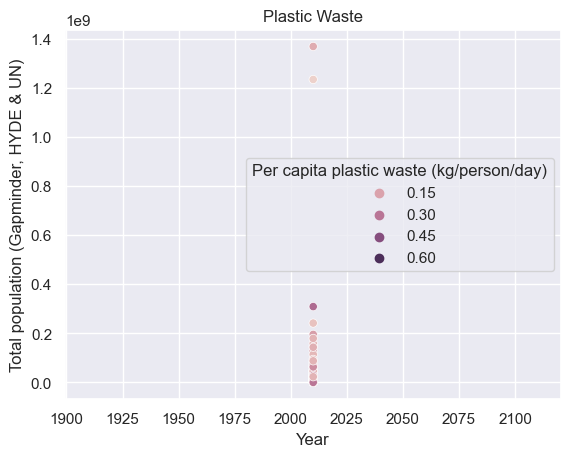

In [19]:
sns.scatterplot(x = GB_df["Year"], y = GB_df["Total population (Gapminder, HYDE & UN)"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

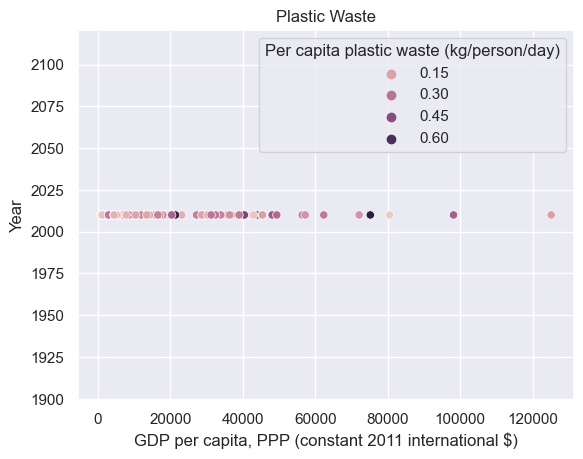

In [20]:
sns.scatterplot(x = GB_df["GDP per capita, PPP (constant 2011 international $)"], y = GB_df["Year"],
                hue = GB_df["Per capita plastic waste (kg/person/day)"], data = GB_df).set(title = "Plastic Waste");

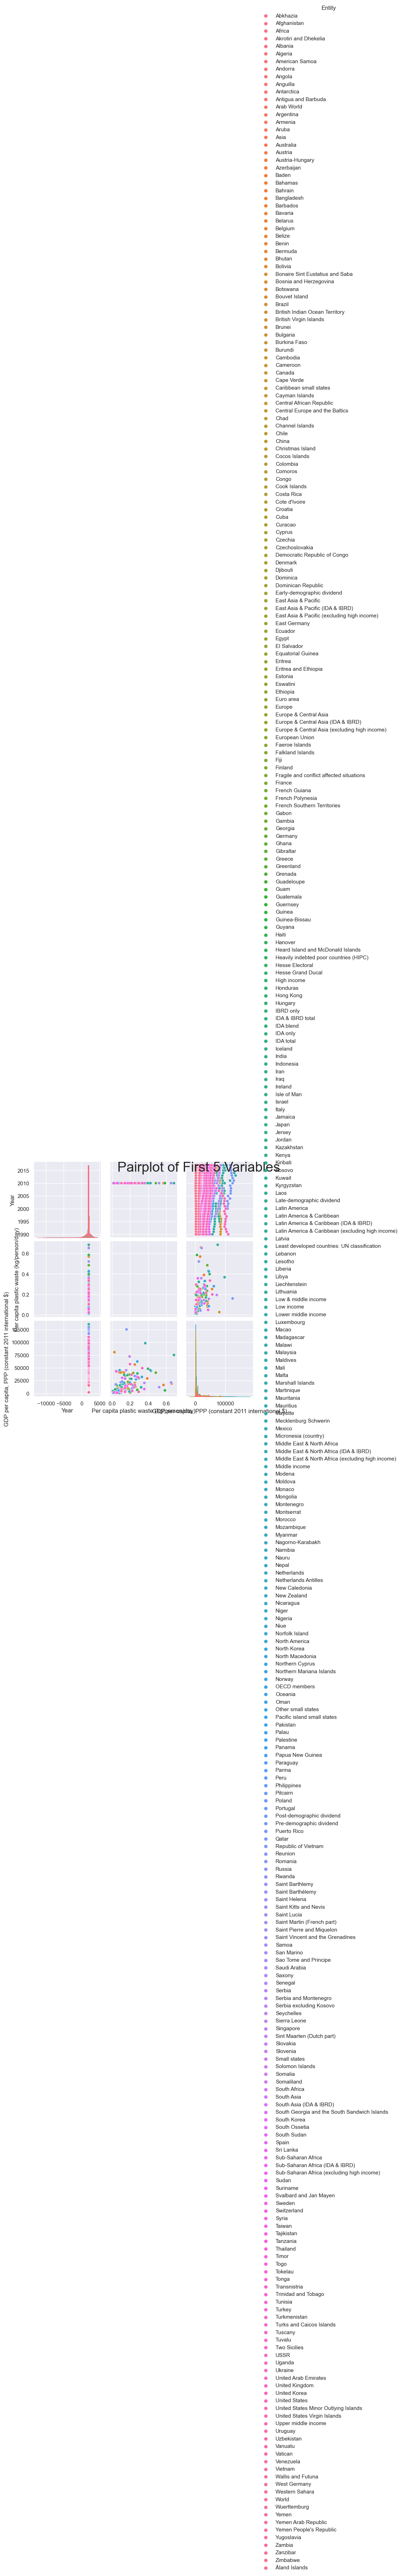

In [21]:
variables = GB_df.iloc[:, :5]
variables["Entity"] = GB_df["Entity"]
sns.pairplot(variables, hue = "Entity")
plt.suptitle("Pairplot of First 5 Variables", fontsize = 28)
plt.show()

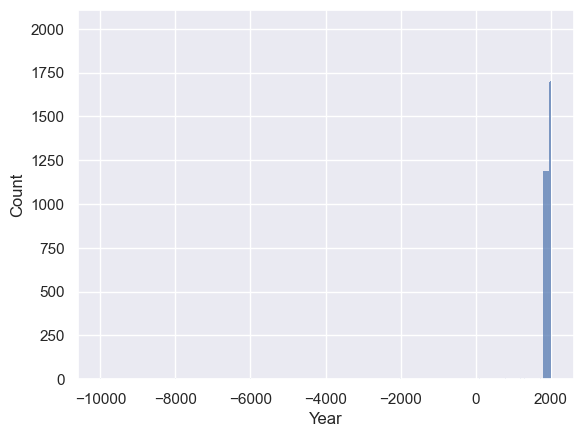

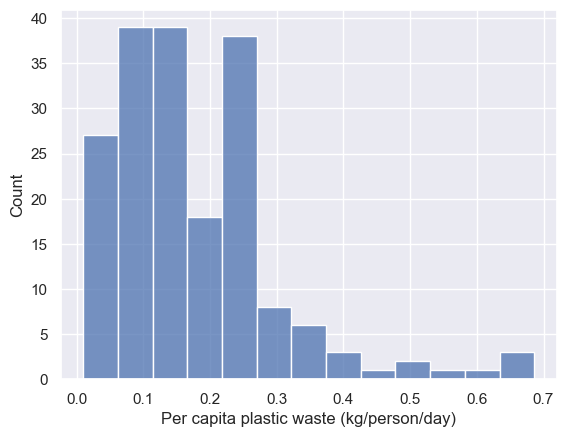

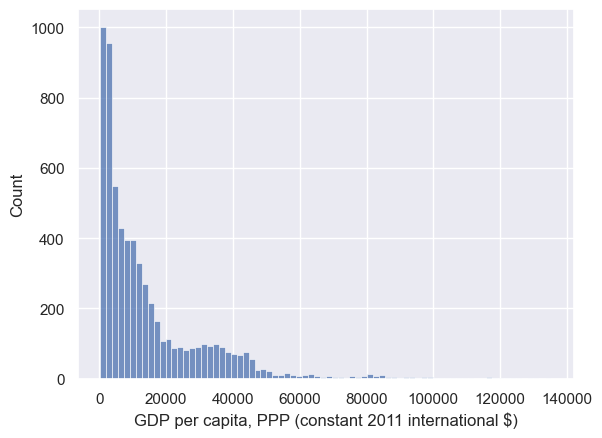

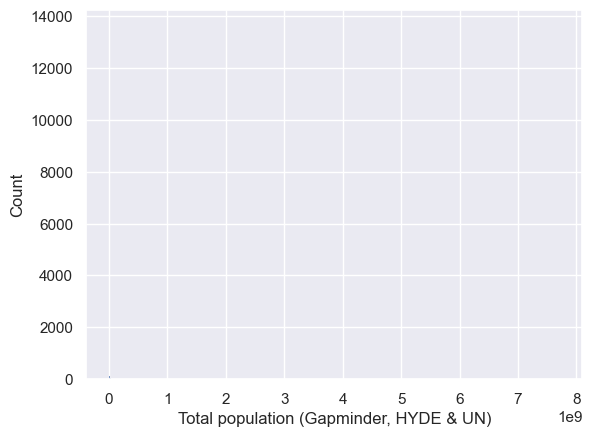

In [22]:
for i in GB_df.select_dtypes(include="number").columns:
    sns.histplot(data=GB_df, x=i)
    plt.show()

In [23]:
GB_df.iloc[:, :5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ MB


## Exploring The Missing Values 

In [24]:
total_data = GB_df.size
total_missing_values = GB_df.isnull().sum().sum()

percentage_missing = (total_missing_values / total_data) * 100
print(f"Number of Missing Values: ", total_missing_values)
print(f"Percentage of Missing Values: {percentage_missing:.2f}%")

Number of Missing Values:  140925
Percentage of Missing Values: 41.80%


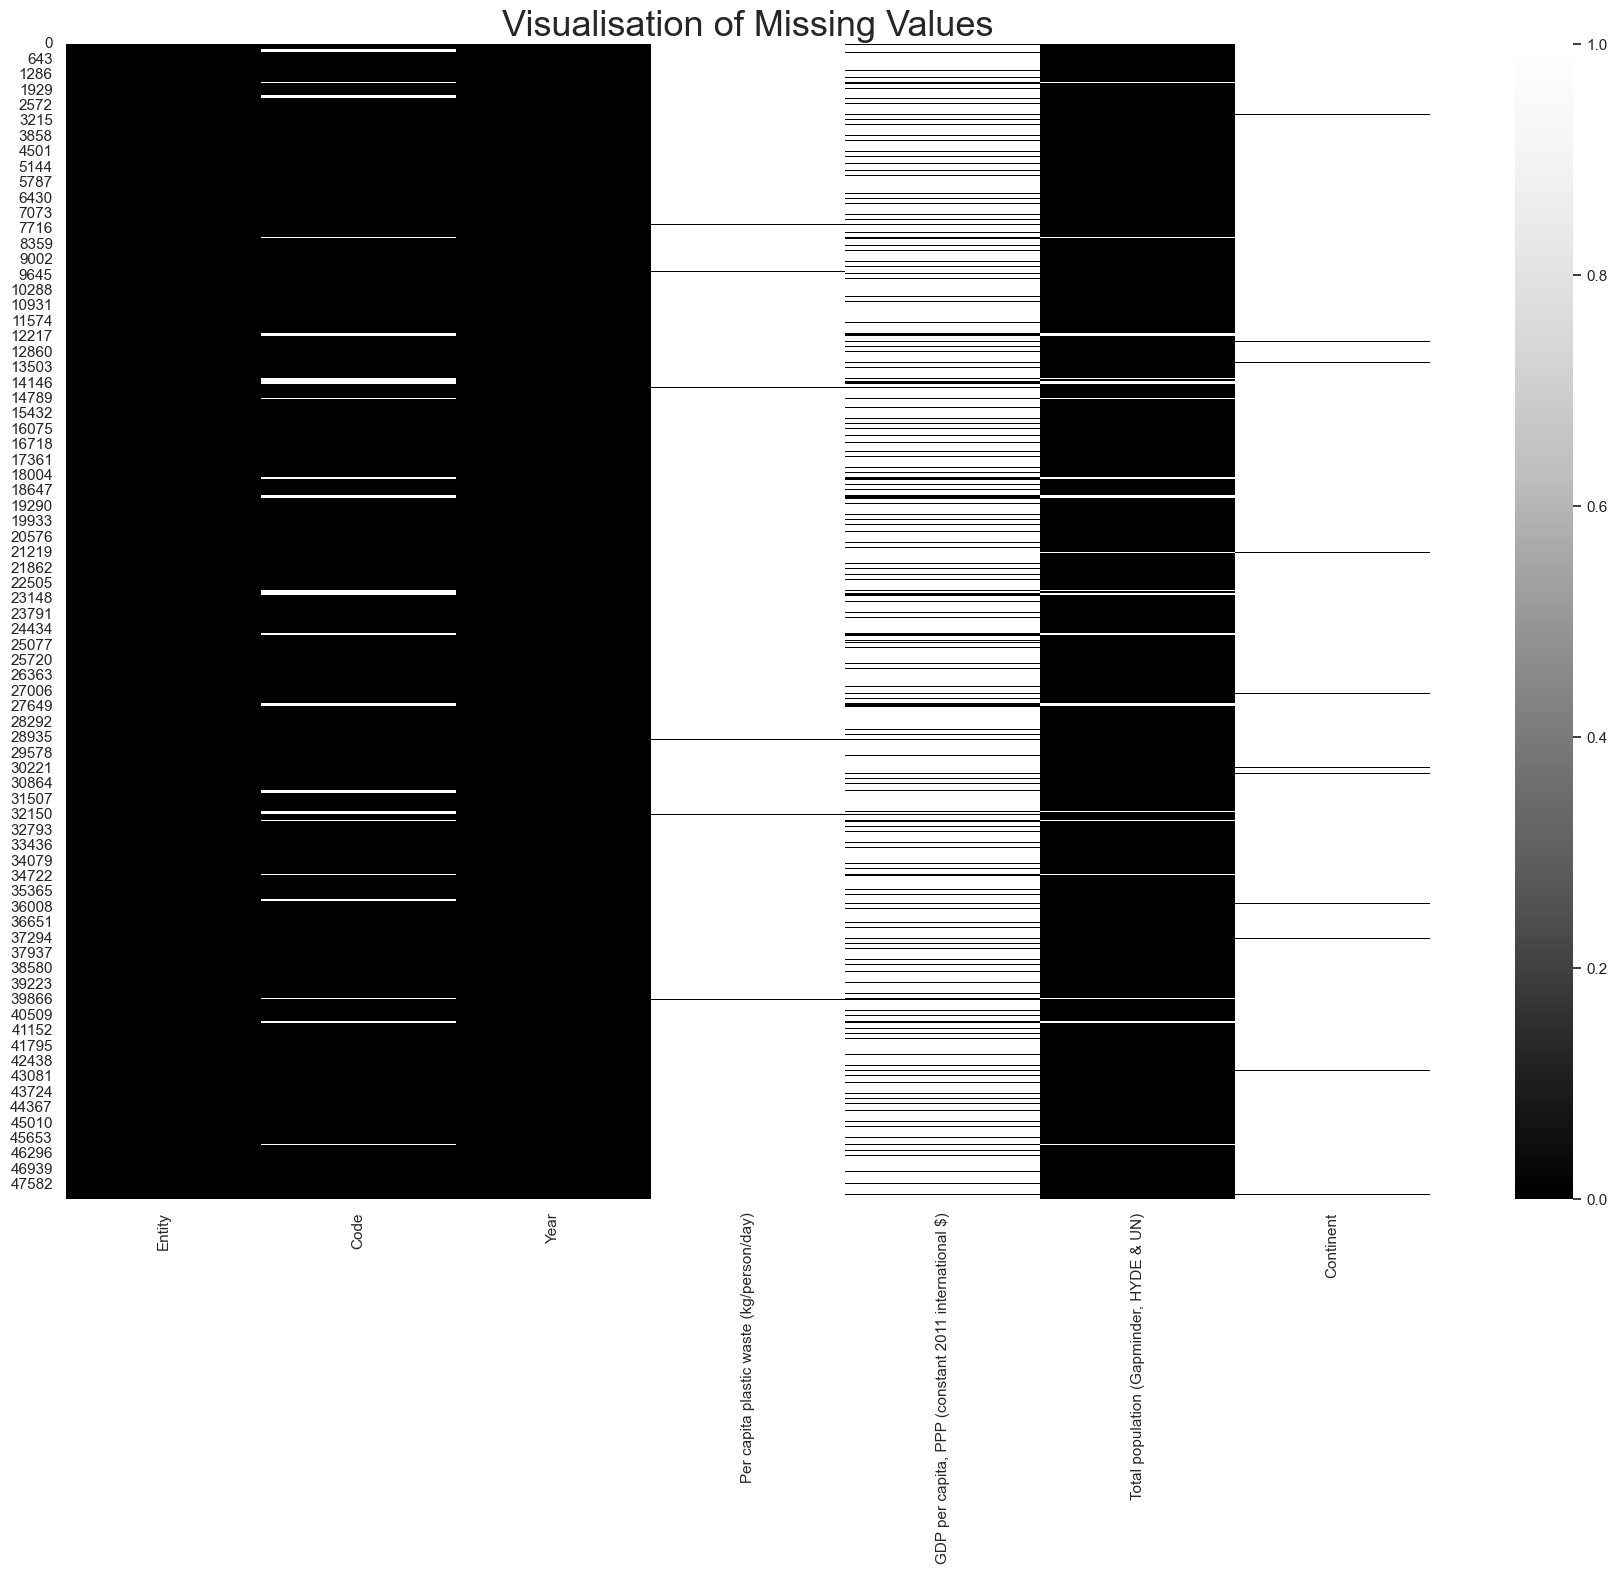

In [25]:
plt.figure(figsize = (22,15))
colourmap = sns.color_palette("Greys_r", as_cmap = True) #flare_r #cividis
sns.heatmap(GB_df.isnull(), cmap = colourmap)
plt.title("Visualisation of Missing Values", fontsize = 26)
plt.show()

In [26]:
total_data = GB_df.size
zero_count = (GB_df ==0).sum().sum()
percentage_zeros = (zero_count / total_data) * 100

print("Number of zeros in the DataFrame: ", zero_count)
print(f"Percentage of Zeros: {percentage_zeros:.2f}%")

Number of zeros in the DataFrame:  6
Percentage of Zeros: 0.00%


In [27]:
duplicate_rows = GB_df[GB_df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Entity, Code, Year, Per capita plastic waste (kg/person/day), GDP per capita, PPP (constant 2011 international $), Total population (Gapminder, HYDE & UN), Continent]
Index: []

## NaN Count

In [28]:
import pandas as pd

#GB_df is a pandas DataFrame

NaN_counts = GB_df.isnull().sum(axis=1)
threshold = 0.9 * GB_df.shape[1]
rows_with_90_percent_NaN = NaN_counts[NaN_counts > threshold]

print(f"Number of rows with more than 90% NaN values: {len(rows_with_90_percent_NaN)}")

list_of_rows = rows_with_90_percent_NaN.index.tolist()
print("List of rows with more than 90% NaN values:")
print(list_of_rows)

Number of rows with more than 90% NaN values: 0
List of rows with more than 90% NaN values:
[]


### 90% NaN

In [29]:
rows_90_percent_nan = GB_df.iloc[list_of_rows]
print(rows_90_percent_nan)

Empty DataFrame
Columns: [Entity, Code, Year, Per capita plastic waste (kg/person/day), GDP per capita, PPP (constant 2011 international $), Total population (Gapminder, HYDE & UN), Continent]
Index: []


In [30]:
(0 / 48168) * 100

0.0

In summary, the code provides a visual representation of missing values in each feature, highlighting those that exceed a defined threshold.

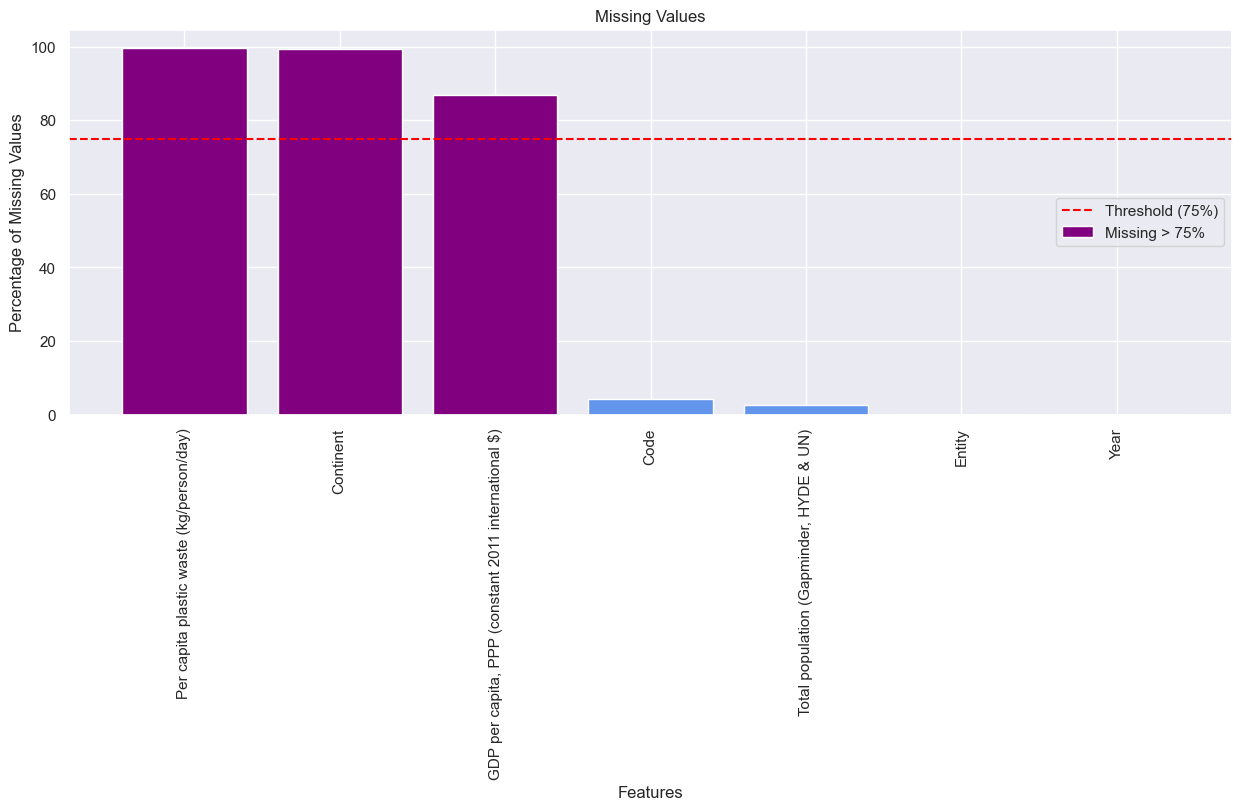

In [32]:
missing_values_percentage = GB_df.isna().sum() / len(GB_df) * 100
missing_values_percentage = missing_values_percentage.sort_values(ascending = False)
highlight_threshold = 75

fig, ax = plt.subplots(figsize=(15, 5))
bar_color = "cornflowerblue"
highlight_color = "purple"

ax.bar(missing_values_percentage.index, missing_values_percentage, color = bar_color)
ax.bar(missing_values_percentage.index[missing_values_percentage > highlight_threshold],
       missing_values_percentage[missing_values_percentage > highlight_threshold],
       color = highlight_color, label = f"Missing > {highlight_threshold}%")
ax.axhline(y = highlight_threshold, color = "red", linestyle = "--", label = f"Threshold ({highlight_threshold}%)")

plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values")
plt.legend(loc = "center right")
plt.show()

## Exploring the Variables with The Most Missing Data

In [33]:
miss_percent = (GB_df.isnull().sum() / len(GB_df)) * 100
var_75_plus_miss = miss_percent[miss_percent > 75].index.tolist()
print(var_75_plus_miss)

['Per capita plastic waste (kg/person/day)', 'GDP per capita, PPP (constant 2011 international $)', 'Continent']


## Removing Variables with more than 75% Missing Values

In [34]:
GB_df.shape

(48168, 7)

In [35]:
GB_df = GB_df.drop(columns = var_75_plus_miss)

In [36]:
GB_df.shape

(48168, 4)

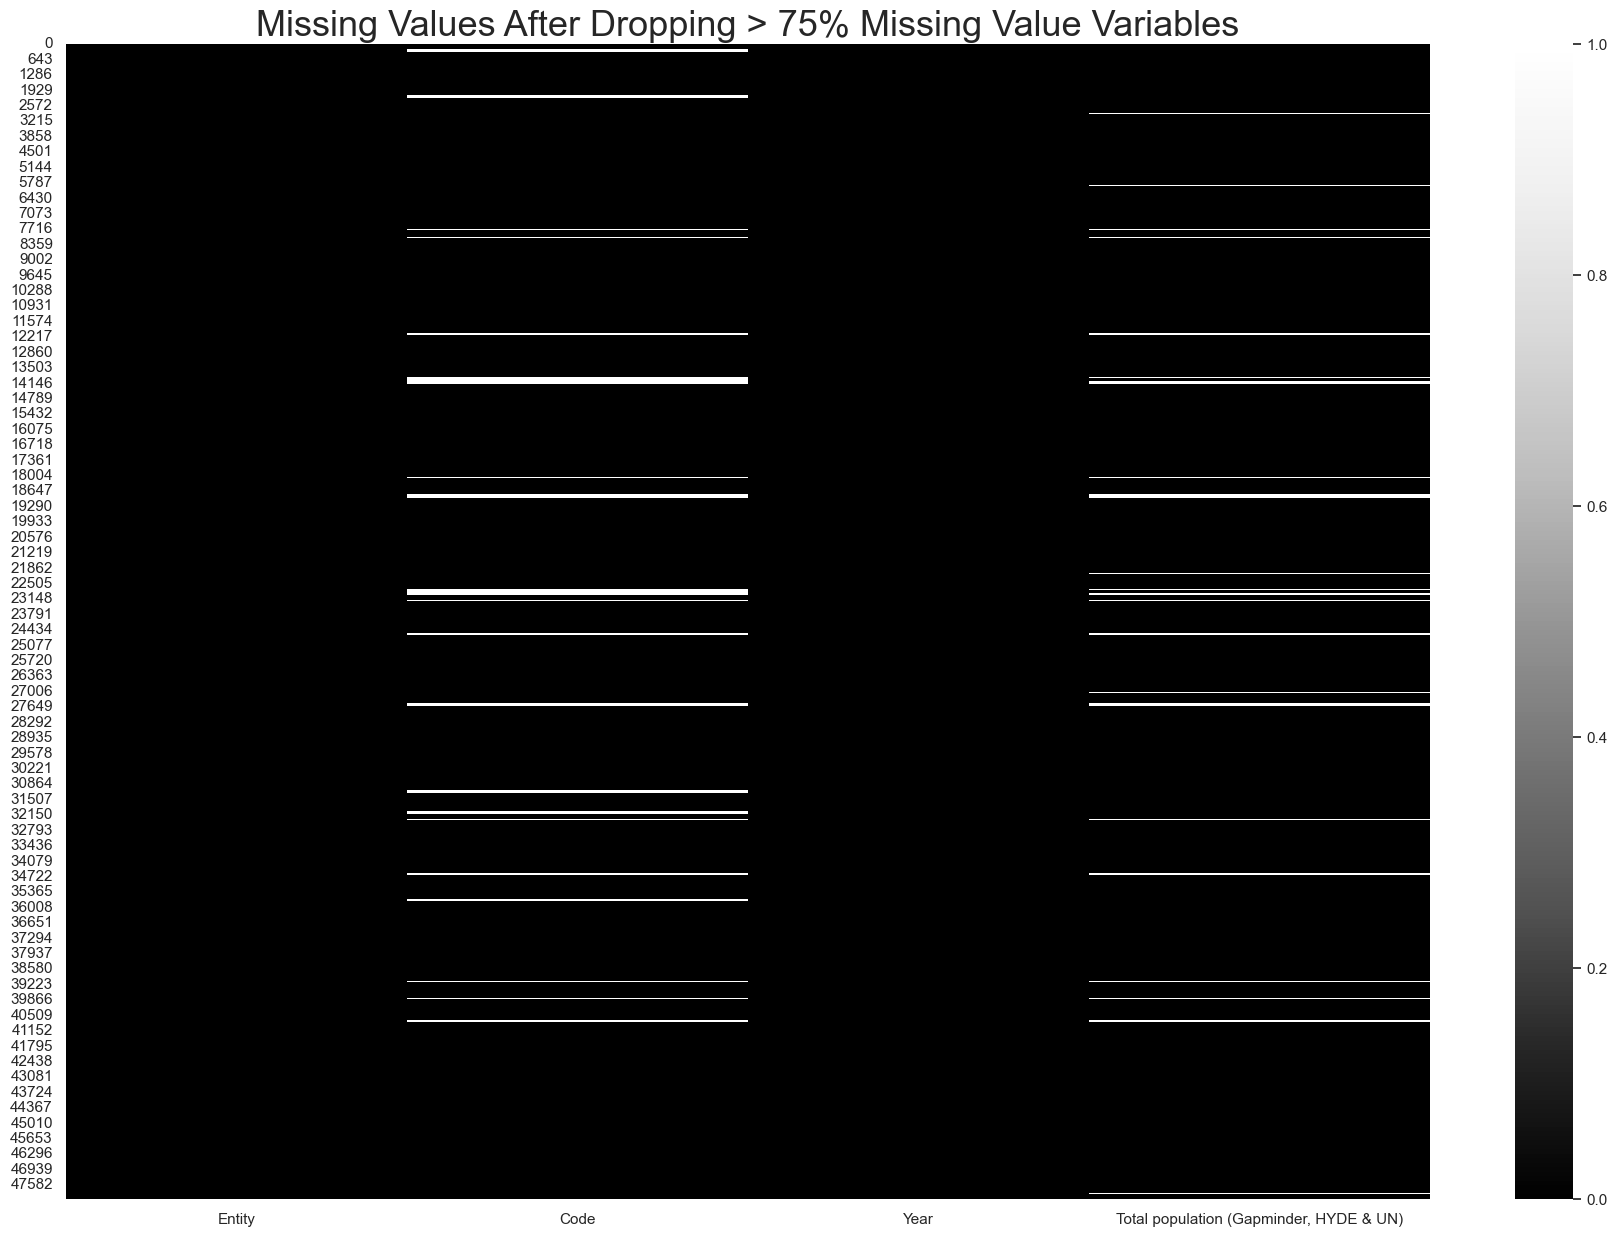

In [37]:
plt.figure(figsize = (22,15))
colourmap = sns.color_palette("Greys_r", as_cmap = True) #flare_r #cividis
sns.heatmap(GB_df.isnull(), cmap = colourmap)
plt.title("Missing Values After Dropping > 75% Missing Value Variables", fontsize = 26)
plt.show()

## Exploring Median and Min_Max Values

In [38]:
def summarise_variables(GB_df):
    summary = pd.DataFrame(columns = ["Variable", "Median", "Min", "Max"])
    
    for column in GB_df.columns:
        if pd.api.types.is_numeric_dtype(GB_df[column]):
            median = GB_df[column].median()
            minimum = GB_df[column].min()
            maximum = GB_df[column].max()
            new_row = pd.DataFrame({"Variable": column, "Median": median,
                                      "Min" : minimum, "Max": maximum}, index = [0])
            summary = pd.concat([summary, new_row], ignore_index = True)
    return summary

In [39]:
summary = summarise_variables(GB_df)
pd.options.display.max_rows = None
print(summary)

                                  Variable     Median     Min           Max
0                                     Year     1920.0  -10000          2019
1  Total population (Gapminder, HYDE & UN)  1542937.0   905.0  7713467904.0


In [42]:
summary.head()

Variable     Median     Min           Max
0                                     Year     1920.0  -10000          2019
1  Total population (Gapminder, HYDE & UN)  1542937.0   905.0  7713467904.0

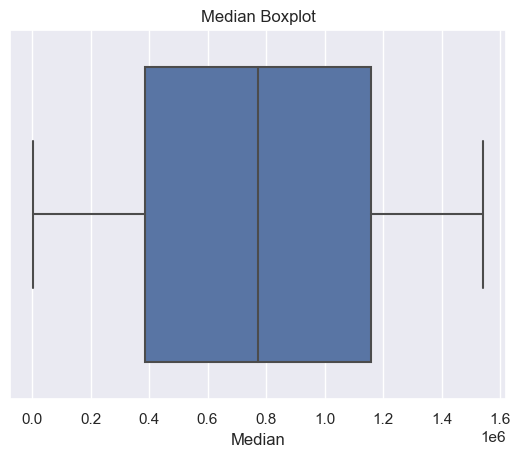

In [43]:
median_boxplot = sns.boxplot(x = summary["Median"])
median_boxplot.set_title("Median Boxplot")
plt.show();

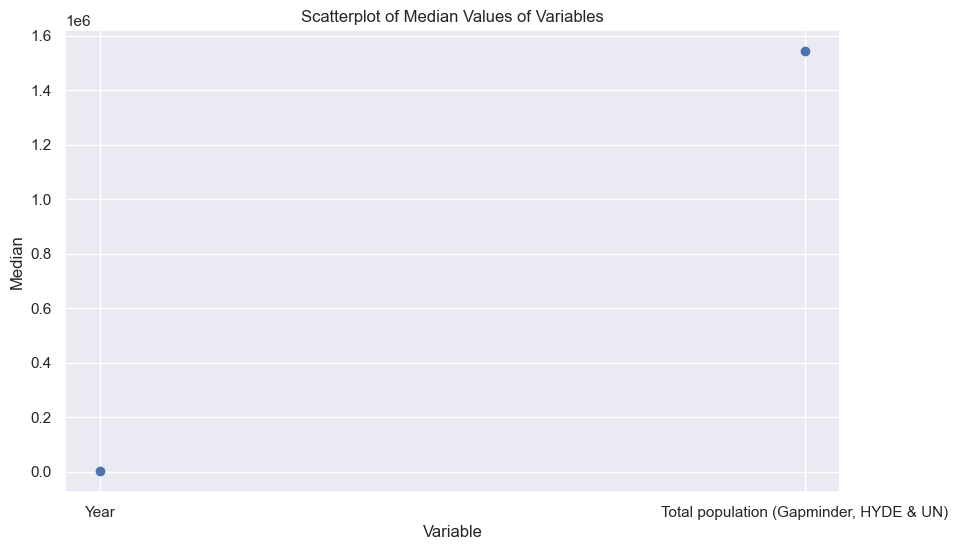

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Median"])
ax.set_xlabel("Variable")
ax.set_ylabel("Median")
ax.set_title("Scatterplot of Median Values of Variables")
plt.show();

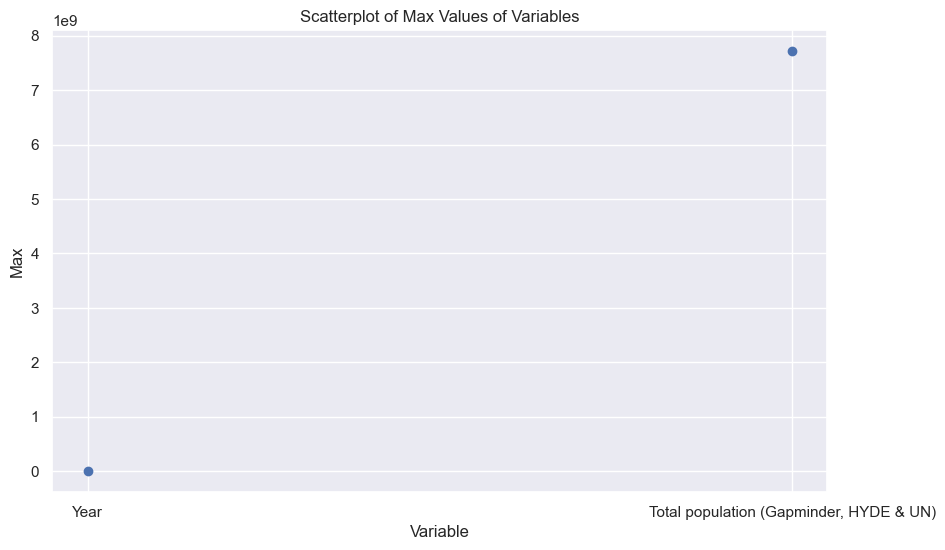

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Max"])
ax.set_xlabel("Variable")
ax.set_ylabel("Max")
ax.set_title("Scatterplot of Max Values of Variables")
plt.show();

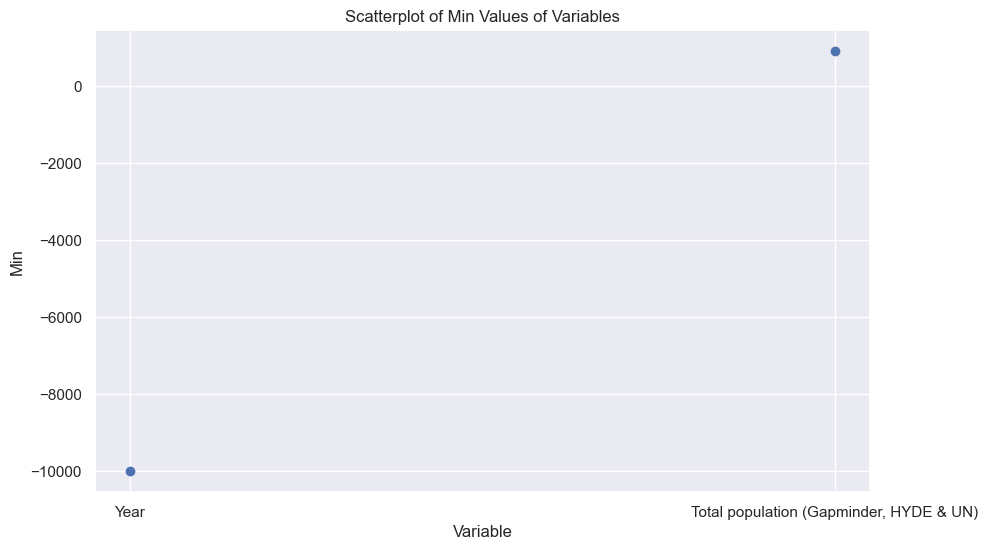

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(summary["Variable"], summary["Min"])
ax.set_xlabel("Variable")
ax.set_ylabel("Min")
ax.set_title("Scatterplot of Min Values of Variables")
plt.show();

In [47]:
GB_df.isnull().sum().sum()

3299

In [48]:
GB_percent = ((140925 - 3299)/140925) * 100
print("Percent of Missing Values Dropped: ", GB_percent)
total_data = GB_df.size
total_missing_values = GB_df.isnull().sum().sum()

percentage_missing = (total_missing_values / total_data) * 100
print(f"Number of Missing Values Currently: ", total_missing_values)
print(f"Percentage of Missing Values: {percentage_missing:.2f}%")

Percent of Missing Values Dropped:  97.65903849565372
Number of Missing Values Currently:  3299
Percentage of Missing Values: 1.71%


In [49]:
GB_df.isnull().sum()

Entity                                        0
Code                                       2014
Year                                          0
Total population (Gapminder, HYDE & UN)    1285
dtype: int64

## Exploring Target Variable

In [50]:
GB_df["Entity"].value_counts()

Entity
Lithuania                                             220
Nigeria                                               220
Luxembourg                                            220
Madagascar                                            220
Malawi                                                220
Malaysia                                              220
Maldives                                              220
Mali                                                  220
Malta                                                 220
Marshall Islands                                      220
Mauritania                                            220
Mauritius                                             220
Uzbekistan                                            220
Mexico                                                220
Micronesia (country)                                  220
Uruguay                                               220
Moldova                                               220
Monaco 

In [51]:
GB_df["Year"].value_counts()

Year
 2015     337
 2010     292
 2011     287
 2000     287
 2001     287
 2002     287
 2017     287
 2016     287
 2014     287
 2012     287
 2013     287
 2009     287
 2008     287
 2007     287
 2006     287
 2005     287
 2004     287
 2003     287
 1996     284
 1990     284
 1991     284
 1992     284
 1993     284
 1994     284
 1995     284
 1997     284
 1998     284
 1999     284
 1972     242
 1960     242
 1970     242
 1969     242
 1968     242
 1967     242
 1966     242
 1965     242
 1964     242
 1962     242
 1961     242
 1958     242
 1959     242
 1952     242
 1957     242
 1956     242
 1955     242
 1954     242
 1953     242
 1950     242
 1951     242
 1971     242
 1963     242
 1973     242
 1981     242
 1974     242
 1989     242
 1988     242
 1987     242
 1986     242
 1985     242
 1984     242
 1983     242
 2019     242
 1982     242
 1980     242
 1979     242
 1978     242
 1977     242
 1976     242
 1975     242
 2018     242
 1900     204
 

In [52]:
GB_df["Total population (Gapminder, HYDE & UN)"].value_counts()

Total population (Gapminder, HYDE & UN)
2.000000e+03    160
6.000000e+03    145
5.000000e+03    128
1.000000e+03     90
8.000000e+03     80
7.000000e+03     80
3.700000e+04     77
9.000000e+03     74
1.000000e+04     71
1.100000e+04     71
8.600000e+04     66
2.400000e+04     64
1.200000e+04     63
1.400000e+04     62
1.800000e+04     61
3.000000e+03     58
1.210000e+05     58
2.290000e+05     57
7.470000e+05     54
9.050000e+02     54
3.000000e+04     53
2.000000e+04     53
7.370000e+05     53
1.432000e+06     52
6.447400e+04     52
1.409200e+04     51
8.128000e+04     51
4.015300e+04     51
2.574000e+06     51
1.500000e+04     49
2.900000e+04     49
1.900000e+04     48
5.600000e+04     48
5.700000e+04     42
2.099540e+05     41
6.400000e+04     41
1.659440e+05     41
5.500000e+04     38
3.400000e+04     38
1.300000e+04     38
2.300000e+04     38
6.000000e+04     38
9.140000e+02     37
6.200000e+04     37
4.800000e+04     36
1.000000e+05     36
1.080000e+05     35
3.300000e+04     35


In [53]:
GB_df["Entity"].isnull().sum()

0

In [54]:
GB_df["Year"].isnull().sum()

0

In [55]:
GB_df["Total population (Gapminder, HYDE & UN)"].isnull().sum()

1285

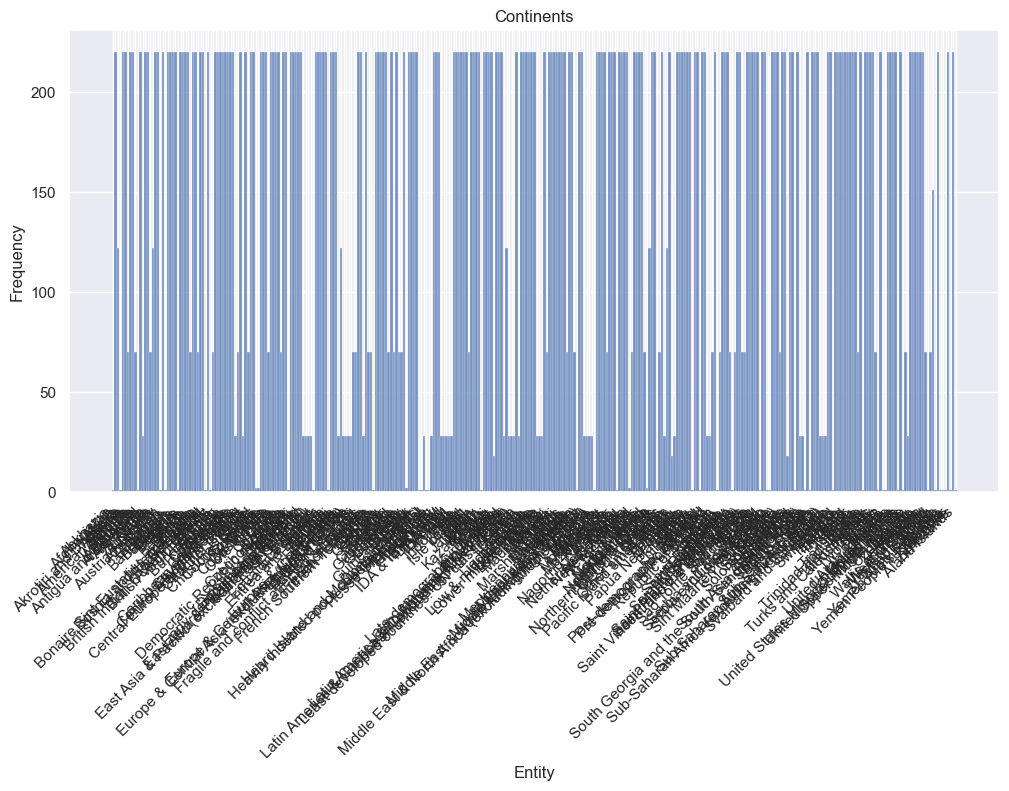

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# Plot the histogram with rotated x-axis labels and adjusted bins
sns.histplot(GB_df["Entity"], bins=20, kde=False)
plt.title("Continents")
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right") 
plt.show()

### Scaling the Data

In [66]:
X = GB_df.drop("Entity", axis = 1)
y = GB_df["Entity"]

In [67]:
print("Variable dataset to be scaled: ", X.shape)
print("Target Variable - Entity: ", y.shape)
print("Target Variable - Year: ", y.shape)

Variable dataset to be scaled:  (48168, 3)
Target Variable - Entity:  (48168,)
Target Variable - Year:  (48168,)


## Ecoding Data:

In [68]:
X_encoded = pd.get_dummies(X)

In [69]:
X_numeric = X.select_dtypes(include=['number'])

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# X is the feature matrix

# Identify numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

#Transformers for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

#Column transformer to apply transformers to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('non_num', non_numeric_transformer, non_numeric_cols)
    ])

# Apply the preprocessing to data
X_preprocessed = preprocessor.fit_transform(X)

# Convert the sparse matrix to a dense NumPy array
X_dense = X_preprocessed.toarray()

# Now, The RobustScaler with with_centering=False
scaler_robust = RobustScaler(with_centering=False)
X_robust = scaler_robust.fit_transform(X_dense)


In [71]:
print("Transformed Data:")
print(X_robust[:100, :])  # Print the first 5 rows

Transformed Data:
[[ 0.96424619  0.          0.         ...  0.          0.
   0.        ]
 [ 0.85217722 -1.09874187  0.         ...  0.          0.
   0.        ]
 [ 0.86079791 -0.93454398  0.         ...  0.          0.
   0.        ]
 ...
 [-0.19954692 -3.86293808  0.         ...  0.          0.
   0.        ]
 [-0.19092623 -3.85871393  0.         ...  0.          0.
   0.        ]
 [-0.18230554 -3.85437014  0.         ...  0.          0.
   0.        ]]


In [72]:
import pandas as pd

GB_df = pd.DataFrame(GB_df, columns=GB_df.columns)  

print(GB_df.head())

        Entity      Code  Year  Total population (Gapminder, HYDE & UN)
0     Abkhazia  OWID_ABK  2015                                      NaN
1  Afghanistan       AFG  2002                               22601000.0
2  Afghanistan       AFG  2003                               23681000.0
3  Afghanistan       AFG  2004                               24727000.0
4  Afghanistan       AFG  2005                               25654000.0


In [73]:
column_names = GB_df.columns
print(column_names)

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)'], dtype='object')


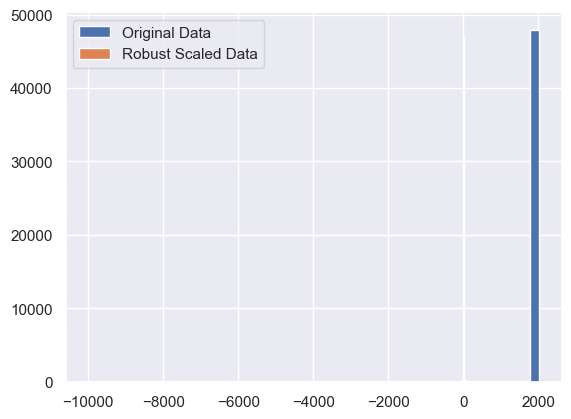

In [74]:
import matplotlib.pyplot as plt

#specific feature by column name
feature_name = "Year" 

# Find the index of the chosen feature in the original DataFrame
feature_index = X.columns.get_loc(feature_name)

# Plot histograms of original and transformed data for the chosen feature
plt.hist(X.iloc[:, feature_index], bins=50, label='Original Data')
plt.hist(X_robust[:, feature_index], bins=50, label='Robust Scaled Data')
plt.legend()
plt.show()


## Using KNN Imputer to Impute Missing Values

In [75]:
from sklearn.impute import KNNImputer

knn_imputer_numeric = KNNImputer(n_neighbors=4)
GB_df[numeric_cols] = knn_imputer_numeric.fit_transform(GB_df[numeric_cols])

In [76]:
# Step 1: Identify numeric and categorical columns
numeric_cols = GB_df.select_dtypes(include=['number']).columns
categorical_cols = GB_df.select_dtypes(exclude=['number']).columns

# Step 2: Impute numeric values with KNNImputer
from sklearn.impute import KNNImputer
knn_imputer_numeric = KNNImputer(n_neighbors=4)
GB_df[numeric_cols] = knn_imputer_numeric.fit_transform(GB_df[numeric_cols])

# Step 3: Handle categorical variables (fill with mode)
GB_df[categorical_cols] = GB_df[categorical_cols].fillna(GB_df[categorical_cols].mode().iloc[0])

In [77]:
print(GB_df.head())

        Entity      Code    Year  Total population (Gapminder, HYDE & UN)
0     Abkhazia  OWID_ABK  2015.0                                7196250.0
1  Afghanistan       AFG  2002.0                               22601000.0
2  Afghanistan       AFG  2003.0                               23681000.0
3  Afghanistan       AFG  2004.0                               24727000.0
4  Afghanistan       AFG  2005.0                               25654000.0


In [78]:
GB_df.describe()

Year  Total population (Gapminder, HYDE & UN)
count  48168.000000                             4.816800e+04
mean    1903.147442                             4.960635e+07
std      315.716839                             3.212540e+08
min   -10000.000000                             9.050000e+02
25%     1859.000000                             2.188212e+05
50%     1920.000000                             1.658632e+06
75%     1975.000000                             6.621401e+06
max     2019.000000                             7.713468e+09

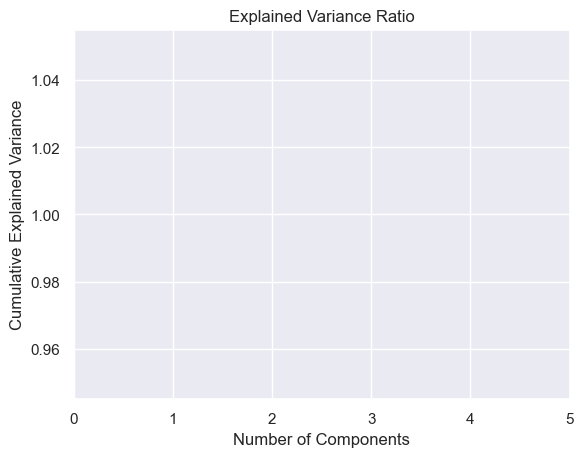

In [79]:
# Identify numeric columns
numeric_cols = GB_df.select_dtypes(include=['number']).columns

# Select only numeric columns for PCA
X_numeric = GB_df[numeric_cols]

# Apply PCA
pca = PCA(0.92).fit(X_numeric)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 5)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title('Explained Variance Ratio')
plt.show()


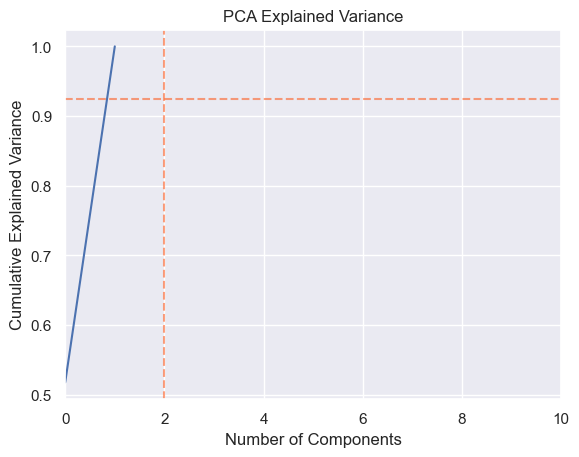

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_numeric is your numeric data
X_numeric = GB_df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
X_numeric_standardized = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA().fit(X_numeric_standardized)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.axhline(0.9250,color= "orangered",alpha=.5,ls="--")
plt.axvline(2,color= "orangered",alpha=.5,ls="--");
plt.xlim(0,10)
plt.show()

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = GB_df.select_dtypes(include=['number']).columns

# Select only numeric columns for PCA
X_numeric = GB_df[numeric_cols]

# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(0.92).fit(X_scaled)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.51764305 0.48235695]


### LDA

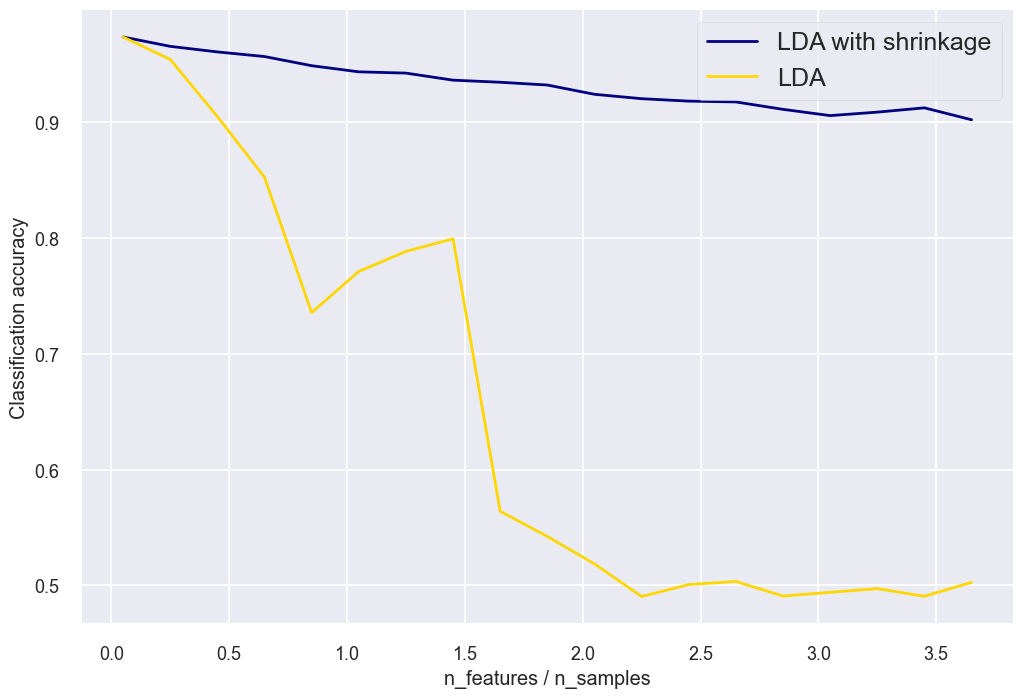

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='gold')

    plt.xlabel('n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 18})
    plt.tight_layout()

In [83]:
numeric_cols = GB_df.select_dtypes(include=['number']).columns
categorical_cols = GB_df.select_dtypes(exclude=['number']).columns


In [84]:
GB_df_encoded = pd.get_dummies(GB_df, columns=categorical_cols)

In [85]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
GB_df_imputed = imputer.fit_transform(GB_df_encoded)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
GB_df_scaled = scaler.fit_transform(GB_df_imputed)

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(GB_df_scaled)

In [88]:
transformed_GB_df = pd.DataFrame(X_pca)

In [89]:
transformed_GB_df.head()

0         1
0 -24.741004 -7.617685
1   2.394076  0.702709
2   2.395176  0.702661
3   2.396233  0.702614
4   2.397139  0.702568

In [90]:
transformed_GB_df.shape

(48168, 2)

## New Dataset

In [91]:
transformed_GB_df["Entity"] = GB_df["Entity"]
transformed_GB_df.columns = ["New_1", "New_2", "Entity"]

In [92]:
transformed_GB_df.head()

New_1     New_2       Entity
0 -24.741004 -7.617685     Abkhazia
1   2.394076  0.702709  Afghanistan
2   2.395176  0.702661  Afghanistan
3   2.396233  0.702614  Afghanistan
4   2.397139  0.702568  Afghanistan

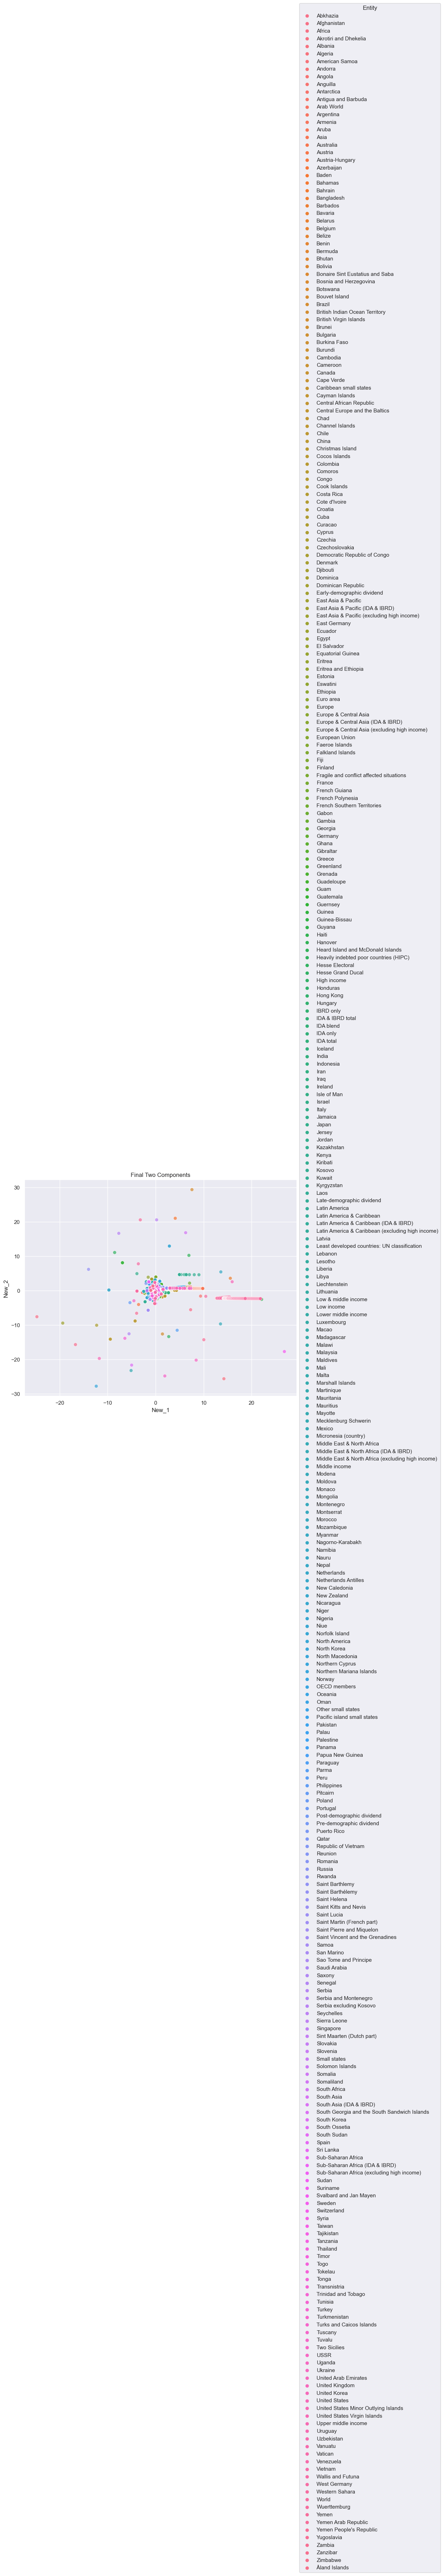

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more readable color palette
sns.set_palette("Set2")

# Set marker size
marker_size = 50

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=transformed_GB_df["New_1"],
    y=transformed_GB_df["New_2"],
    hue=transformed_GB_df["Entity"],
    s=marker_size,
    alpha=0.7,  
)

#legend outside the plot for better readability
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Entity')

#Title
plt.title("Final Two Components")


plt.show()

#### Importance of Variables: USing Spearman Correlation for Diffrent ML Models

In [94]:
print(GB_df.columns)

Index(['Entity', 'Code', 'Year', 'Total population (Gapminder, HYDE & UN)'], dtype='object')


In [95]:
import pandas as pd

columns_to_correlate = ['Year', 'Total population (Gapminder, HYDE & UN)']
selected_columns = GB_df[columns_to_correlate]

spearman_corr = selected_columns.corr(method='spearman')

print("Spearman's correlation coefficient for selected columns:")
print(spearman_corr)

Spearman's correlation coefficient for selected columns:
                                             Year  \
Year                                     1.000000   
Total population (Gapminder, HYDE & UN)  0.264378   

                                         Total population (Gapminder, HYDE & UN)  
Year                                                                    0.264378  
Total population (Gapminder, HYDE & UN)                                 1.000000  


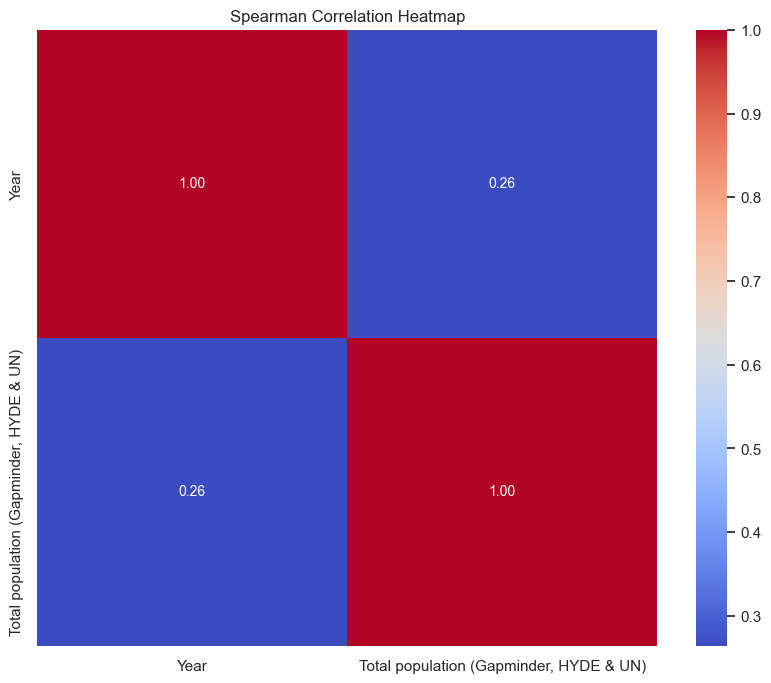

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Spearman Correlation Heatmap')
plt.show()

### Decision Tree:

In [97]:
from sklearn.tree import DecisionTreeClassifier      
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') 

In [98]:
import warnings
warnings.filterwarnings('ignore') 

# split dataset in features and target variable
feature_cols = ['Total population (Gapminder, HYDE & UN)']
X = GB_df[feature_cols]             
y = GB_df['Year']                      

print(X, y)

       Total population (Gapminder, HYDE & UN)
0                                 7.196250e+06
1                                 2.260100e+07
2                                 2.368100e+07
3                                 2.472700e+07
4                                 2.565400e+07
5                                 2.643300e+07
6                                 2.710100e+07
7                                 2.772200e+07
8                                 2.839500e+07
9                                 2.918600e+07
10                                3.011700e+07
11                                3.116100e+07
12                                3.227000e+07
13                                3.337100e+07
14                                3.441400e+07
15                                3.538300e+07
16                                3.629600e+07
17                                3.280000e+06
18                                3.280000e+06
19                                3.280000e+06
20           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Training Model

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 100) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 70, random_state = 100)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.032358965841776006
Accuracy: 0.03


# 20%

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.010587502594976126
Accuracy: 0.01


# 30%

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.011141097501902982
Accuracy: 0.01


## Decision Tree Regressor

30%

In [103]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd


X = GB_df[['Total population (Gapminder, HYDE & UN)']]
y = GB_df['Year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#Decision Tree regressor object
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model
regressor.fit(X_train, y_train)

#Next step is to predictions and evaluate your model
# For example:
# y_pred = regressor.predict(X_test)
# Evaluate your regression model as needed


DecisionTreeRegressor(random_state=42)

Mean Squared Error: 135577.41965376076


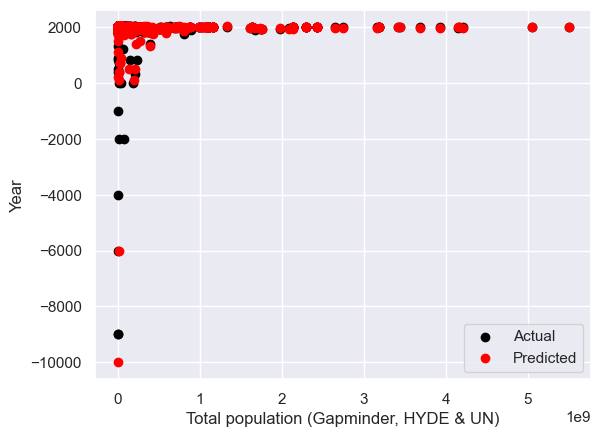

In [104]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate your regression model
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can print or visualize other metrics as needed
# For example, you might want to visualize the actual vs. predicted values
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total population (Gapminder, HYDE & UN)')
plt.ylabel('Year')
plt.legend()
plt.show()


# y_pred = regressor.predict(X_test)

### Evaluate The Regression model

In [106]:
from sklearn.model_selection import train_test_split

# features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression  # Import regressor

# Instantiate the regressor
regressor = LinearRegression()

# Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [108]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

### Evaluate The Model using Mean_Square_Error

In [109]:
from sklearn.metrics import mean_squared_error

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 84181.24754863395


with the Mean Square Error: This indicates that Baseline model required

## Baseline Model:

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

#Baseline model (predicting the mean of the target variable)
baseline_regressor = DummyRegressor(strategy='mean')
baseline_regressor.fit(X_train, y_train)

# Predictions from the baseline model
baseline_predictions = baseline_regressor.predict(X_test)

# Calculate MSE for the baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"Baseline Mean Squared Error: {baseline_mse}")

Baseline Mean Squared Error: 84297.27022406812


## Model Evaluation:

In [111]:
# y_pred = regressor.predict(X_test)

# Calculate MSE for your model
model_mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {model_mse}")

# Compare with the baseline
improvement = baseline_mse - model_mse
print(f"Improvement over Baseline: {improvement}")


Model Mean Squared Error: 84181.24754863395
Improvement over Baseline: 116.0226754341711


## Residual Analysis:

After training your model, it's essential to analyze the residuals (the differences between predicted and actual values). This helps identify patterns or areas where the model may be lacking.

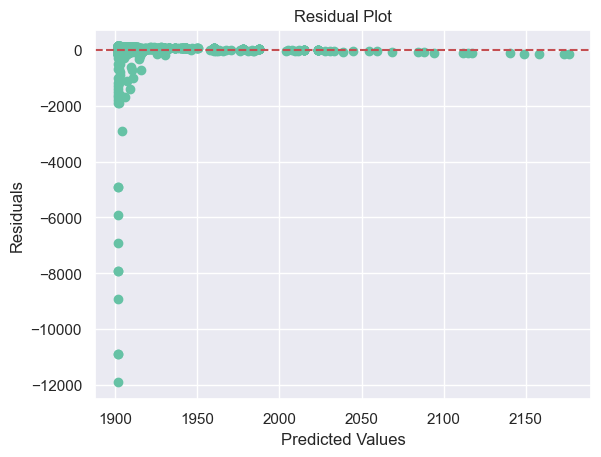

In [112]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Understand the importance of features in the model. For linear regression, This can examine coefficients; for tree-based models, check feature importances.

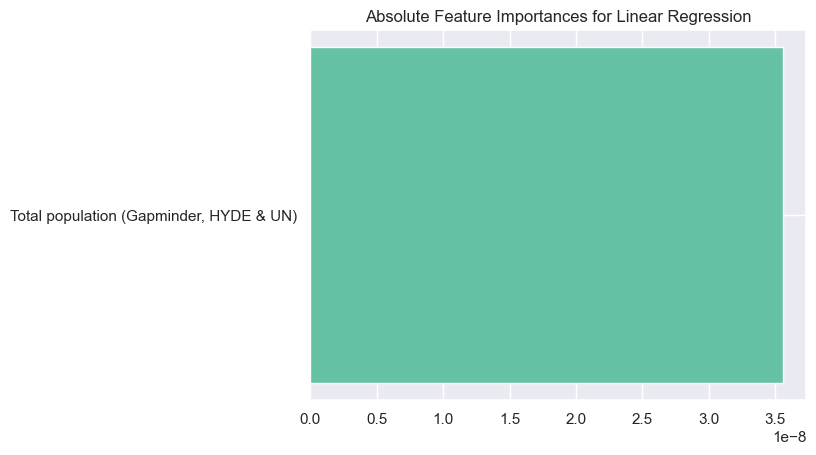

In [113]:
#Feature importances for Linear Regression
coefficients = pd.Series(regressor.coef_, index=X.columns)
coefficients = coefficients.abs().sort_values(ascending=False)

# Visualize feature importances
plt.barh(coefficients.index, coefficients)
plt.title("Absolute Feature Importances for Linear Regression")
plt.show()

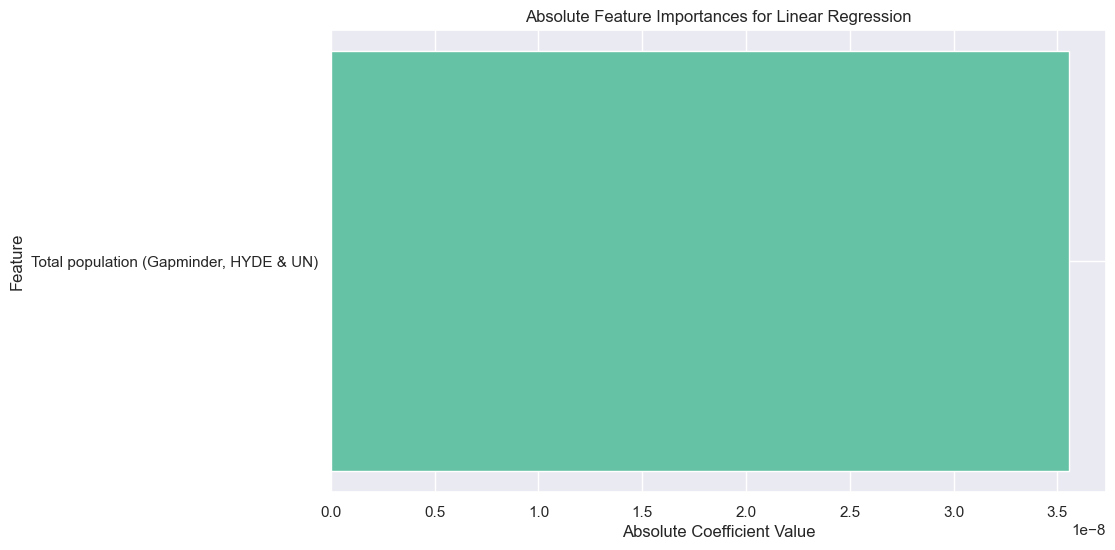

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

#Feature importances for Linear Regression
coefficients = pd.Series(regressor.coef_, index=X.columns)
coefficients = coefficients.abs().sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))  
plt.barh(coefficients.index, coefficients)
plt.title("Absolute Feature Importances for Linear Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()

## Outliers

In [115]:
import numpy as np
import pandas as pd

#'GB_df' is your DataFrame and 'column_name' is the column to check for outliers
column_name = 'Total population (Gapminder, HYDE & UN)'
GB_df = pd.DataFrame({'Total population (Gapminder, HYDE & UN)': [1, 2, 3, 4, 5, 1000]}) 

# Calculate the Z-score for each data point in the specified column
z_scores = np.abs((GB_df[column_name] - GB_df['Total population (Gapminder, HYDE & UN)'].mean()) / GB_df['Total population (Gapminder, HYDE & UN)'].std())

# Define a threshold for the Z-score to identify outliers (e.g., Z-score > 3)
threshold = 3

# Identify outliers
outliers = GB_df[z_scores > threshold]

# Display the outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Total population (Gapminder, HYDE & UN)]
Index: []


This feature selection process helps in improving model performance and reducing overfitting by focusing on the most informative features. It is particularly useful when dealing with datasets with a large number of features.

In [116]:
from sklearn.feature_selection import SelectKBest, f_regression

#X is feature matrix and y is target variable

#SelectKBest with f_regression as the score function
k_best = SelectKBest(score_func=f_regression, k='all')

# Fit and transform the data
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Print or use the selected features
selected_features = X.columns[selected_feature_indices]
print("Selected features:", selected_features)

Selected features: Index(['Total population (Gapminder, HYDE & UN)'], dtype='object')


Why is this important?

Feature Selection: In machine learning, feature selection is crucial to improve model performance, reduce overfitting, and enhance interpretability.
Dimensionality Reduction: Selecting a subset of relevant features helps in reducing the dimensionality of the data.
Model Interpretability: Using fewer features makes it easier to interpret and understand the model.

## Feature Engineering:

### Polynomial Features:

The provided code is an example of using the scikit-learn library to perform polynomial regression, specifically using the Linear Regression model on polynomial features.

In [117]:
from sklearn.preprocessing import PolynomialFeatures

#Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Continue with splitting, training, and evaluating the model

#### Continue with splitting, training, and evaluating the model

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
# Print the first few actual and predicted values
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Actual: 1996.0, Predicted: 2031.3180512305207
Actual: 1891.0, Predicted: 1901.062206135452
Actual: 1907.0, Predicted: 1901.0109857873558
Actual: 1974.0, Predicted: 1900.9086987372104
Actual: 1918.0, Predicted: 1901.0630587430526


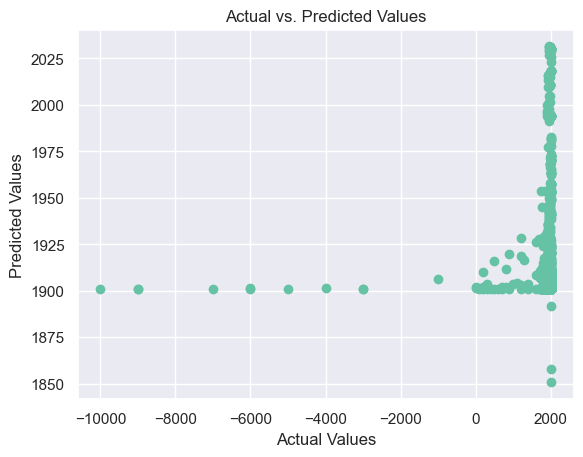

In [120]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

## Feature Scaling:

In [121]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Continue with splitting, training, and evaluating the model

### Continue with splitting, training, and evaluating the model

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [123]:
# Print the first few actual and predicted values
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Actual: 1996.0, Predicted: 2023.253041659319
Actual: 1891.0, Predicted: 1901.7577200378253
Actual: 1907.0, Predicted: 1901.7329977252107
Actual: 1974.0, Predicted: 1901.6836417777106
Actual: 1918.0, Predicted: 1901.7581316034684
Actual: 1882.0, Predicted: 1901.6517722676947
Actual: 1873.0, Predicted: 1901.6339149411199
Actual: 1981.0, Predicted: 1901.6377384303896
Actual: 1893.0, Predicted: 1901.6343495117712
Actual: 1861.0, Predicted: 1902.5686129440555


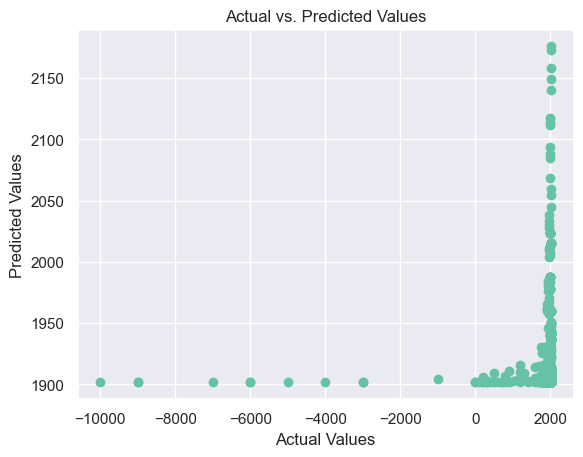

In [124]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

## Handling Categorical Variables:

In [125]:
# Check the columns in your DataFrame 'X'
print(X.columns)

# Use get_dummies for one-hot encoding on the existing column
X_encoded = pd.get_dummies(X, columns=['Total population (Gapminder, HYDE & UN)'], drop_first=True)

# Display the updated DataFrame with one-hot encoding
print(X_encoded.head())


Index(['Total population (Gapminder, HYDE & UN)'], dtype='object')
   Total population (Gapminder, HYDE & UN)_906.0  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Total population (Gapminder, HYDE & UN)_907.0  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Total population (Gapminder, HYDE & UN)_908.0  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          Fals

## Hyperparameter Tuning:

#### Grid search for hyperparameter tuning

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Grid search for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10}


## Cross Validation

In [128]:
from sklearn.model_selection import cross_val_score

#5-fold cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores  # Take the negative of scores

#Evaluate mean and variance of cross-validation scores
mean_mse = mse_scores.mean()
var_mse = mse_scores.std()

print(f"Cross-Validation Mean MSE: {mean_mse}")
print(f"Cross-Validation Variance MSE: {var_mse}")

Cross-Validation Mean MSE: 99601.62856375493
Cross-Validation Variance MSE: 33291.53823576776


# Result: 

In summary, The model has an average MSE of around 99601.63, and the variance in MSE across different cross-validation folds is approximately 33291.54. It's important to consider both values together to assess the overall performance and stability of your model. If the variance is too high, it might be worth investigating ways to make your model more robust, such as regularization techniques or adjusting hyperparameters.

## Advanced Models:

#### Gradient Boosting

In [129]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Mean Squared Error:", gb_mse)

Gradient Boosting Mean Squared Error: 86352.0652390284


## Model Tuning:

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Grid Search
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=50)

## Feature Importance:

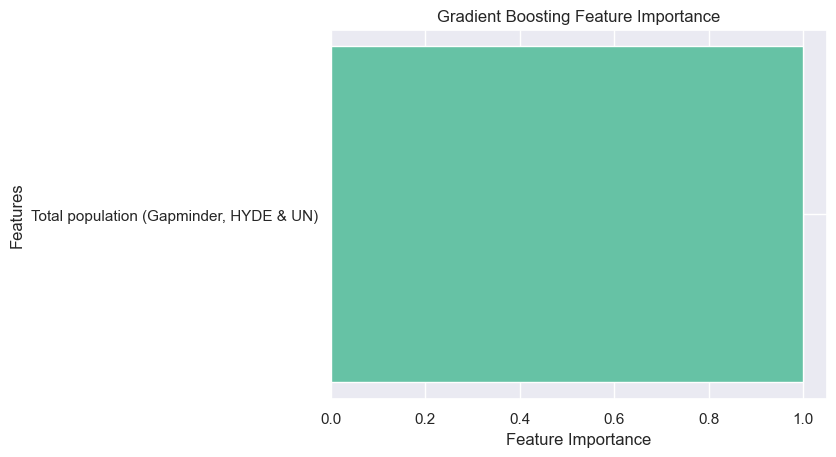

In [131]:
#best_gb_model is the trained Gradient Boosting model
feature_importances = best_gb_model.feature_importances_

# Visualize feature importances
import matplotlib.pyplot as plt

feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Feature Importance')
plt.show()


## Cross-Validation:

In [132]:
from sklearn.model_selection import cross_val_score

#best_gb_model is the trained Gradient Boosting model
cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

#Calculate mean and variance of MSE
cv_mean_mse = -cv_scores.mean()
cv_variance_mse = cv_scores.std()

print(f'Cross-Validation Mean MSE: {cv_mean_mse}')
print(f'Cross-Validation Variance MSE: {cv_variance_mse}')

Cross-Validation Mean MSE: 99515.02184506392
Cross-Validation Variance MSE: 33218.92847187535


### Result

The cross-validation mean mean squared error (MSE) for the model is approximately 99,515.02, and the variance of MSE is around 33,218.93. This indicates that, on average, the model's predictions deviate from the true values by the squared error of about 99,515.02, with a variance of 33,218.93 across different cross-validation folds. Lower MSE values are desirable, suggesting better predictive performance, but it's also important to consider the variance to ensure stability and consistency across different subsets of the data.

# Metrics to Evaluate Feature Engineering:

#### Metrics to Evaluate Feature Engineering

In [133]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)

In [134]:
from sklearn.metrics import precision_score

precision = precision_score(y_train, y_train_pred, average='micro')
print("Precision:", precision)

Precision: 0.012300825245237972


In [135]:
from sklearn.metrics import recall_score

recall = recall_score(y_train, y_train_pred, average='micro')
print("Recall:", recall)

Recall: 0.012300825245237972


In [136]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_train_pred, average='micro')
print("F1 Score:", f1)


F1 Score: 0.012300825245237972


# END